### Importando as bibliotecas

In [1]:
# importes
# manipulação de dados
import pandas as pd
import numpy as np

# visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# configuração do pandas
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# configuração de warnings
import warnings
warnings.filterwarnings('ignore')
SEED = 123

**Carregando o dataset**

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Dicionário:

    1. Pregnancies: Número de vezes que engravidou
    2. Glucose: Concentração de glicose plasmática a 2 horas em um teste oral de tolerância à glicose
    3. BloodPressure: Pressão arterial diastólica (mm Hg)
    4. SkinThickness: Espessura da dobra cutânea do tríceps (mm)
    5. Insulin: Insulina sérica de 2 horas (mu U/ml)
    6. BMI: Índice de massa corporal (peso em kg/(altura em m)^2)
    7. DiabetesPedrigreeFunction: Indicador que pontua a probabilidade de ter diabete com base no histórico familiar
    8. Age: Idade (anos)
    9. Outcome: Variável que indica se tem ou não diabetes

# Análise Exploratória dos Dados (EDA)

### Verificando o tamanho do dataset

In [3]:
df.shape

(768, 9)

**Conclusão: Temos 768 linhas e 9 colunas.**

### Visualizando os tipos dos dados

In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

**Conclusão: Não há váriavel com classificação errada.**

### Verificando se há valores nulos

In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Conclusão: Não valores nulos.**

### Verificando se há linhas duplicadas

In [6]:
df.duplicated().sum()

0

**Conclusão: Não há linhas duplicadas.**

### Verificando a quantidade valores únicos

In [7]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

**Conclusão: Não temos valores únicos.**

### Visualizando algumas estatísticas

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Visualizando as distribuição e boxplot das variáveis

In [9]:
def plot_histbox(data):
    """
    Esta função retorno o plot de um boxplot e de um distplot de cada coluna
    """
    
    # Definindo o tamanho dos gráficos
    f, ax = plt.subplots ( figsize=(20,40) )

    # Cor de fundo
    cor_fundo = '#FFFFFF'
    f.set_facecolor( cor_fundo )

    # Paleta de Cores
    paleta_cores = sns.color_palette( 'Dark2_r', len( data.columns ) * 2 )

    # Titulo
    plt.suptitle( 'Análise das Variáveis', fontsize=22, color='#404040', fontweight=600 )

    # Estruturas para plotar os gráficos
    linhas = len(data.columns)
    colunas = 2 #( Boxplot e Distplot )
    posicao = 1

    # Plotando os gráficos
    for coluna in data.columns:

        # Plot no Grid -- Boxplot
        plt.subplot( linhas, colunas, posicao )

        # Titulo
        plt.title( f'{coluna}', loc='left', fontsize=14, fontweight=200 )

        # Plot
        sns.boxplot( data=df, y=coluna, showmeans=True, saturation=0.75,
                   linewidth=1, color=paleta_cores[ posicao ], width=0.25,  )

        # Mudando de posicao
        posicao += 1

        # Plot no grid -- Distplot
        plt.subplot( linhas, colunas, posicao )

        # Titulo
        plt.title( f'{coluna}', loc='left', fontsize=14, fontweight=200 )

        # Plot
        sns.distplot( df[ coluna ], color=paleta_cores[ posicao - 1 ] )

        # Mudando de posicao
        posicao += 1

    # Ajustando o Grid
    plt.subplots_adjust( top=0.95, hspace=0.3 )

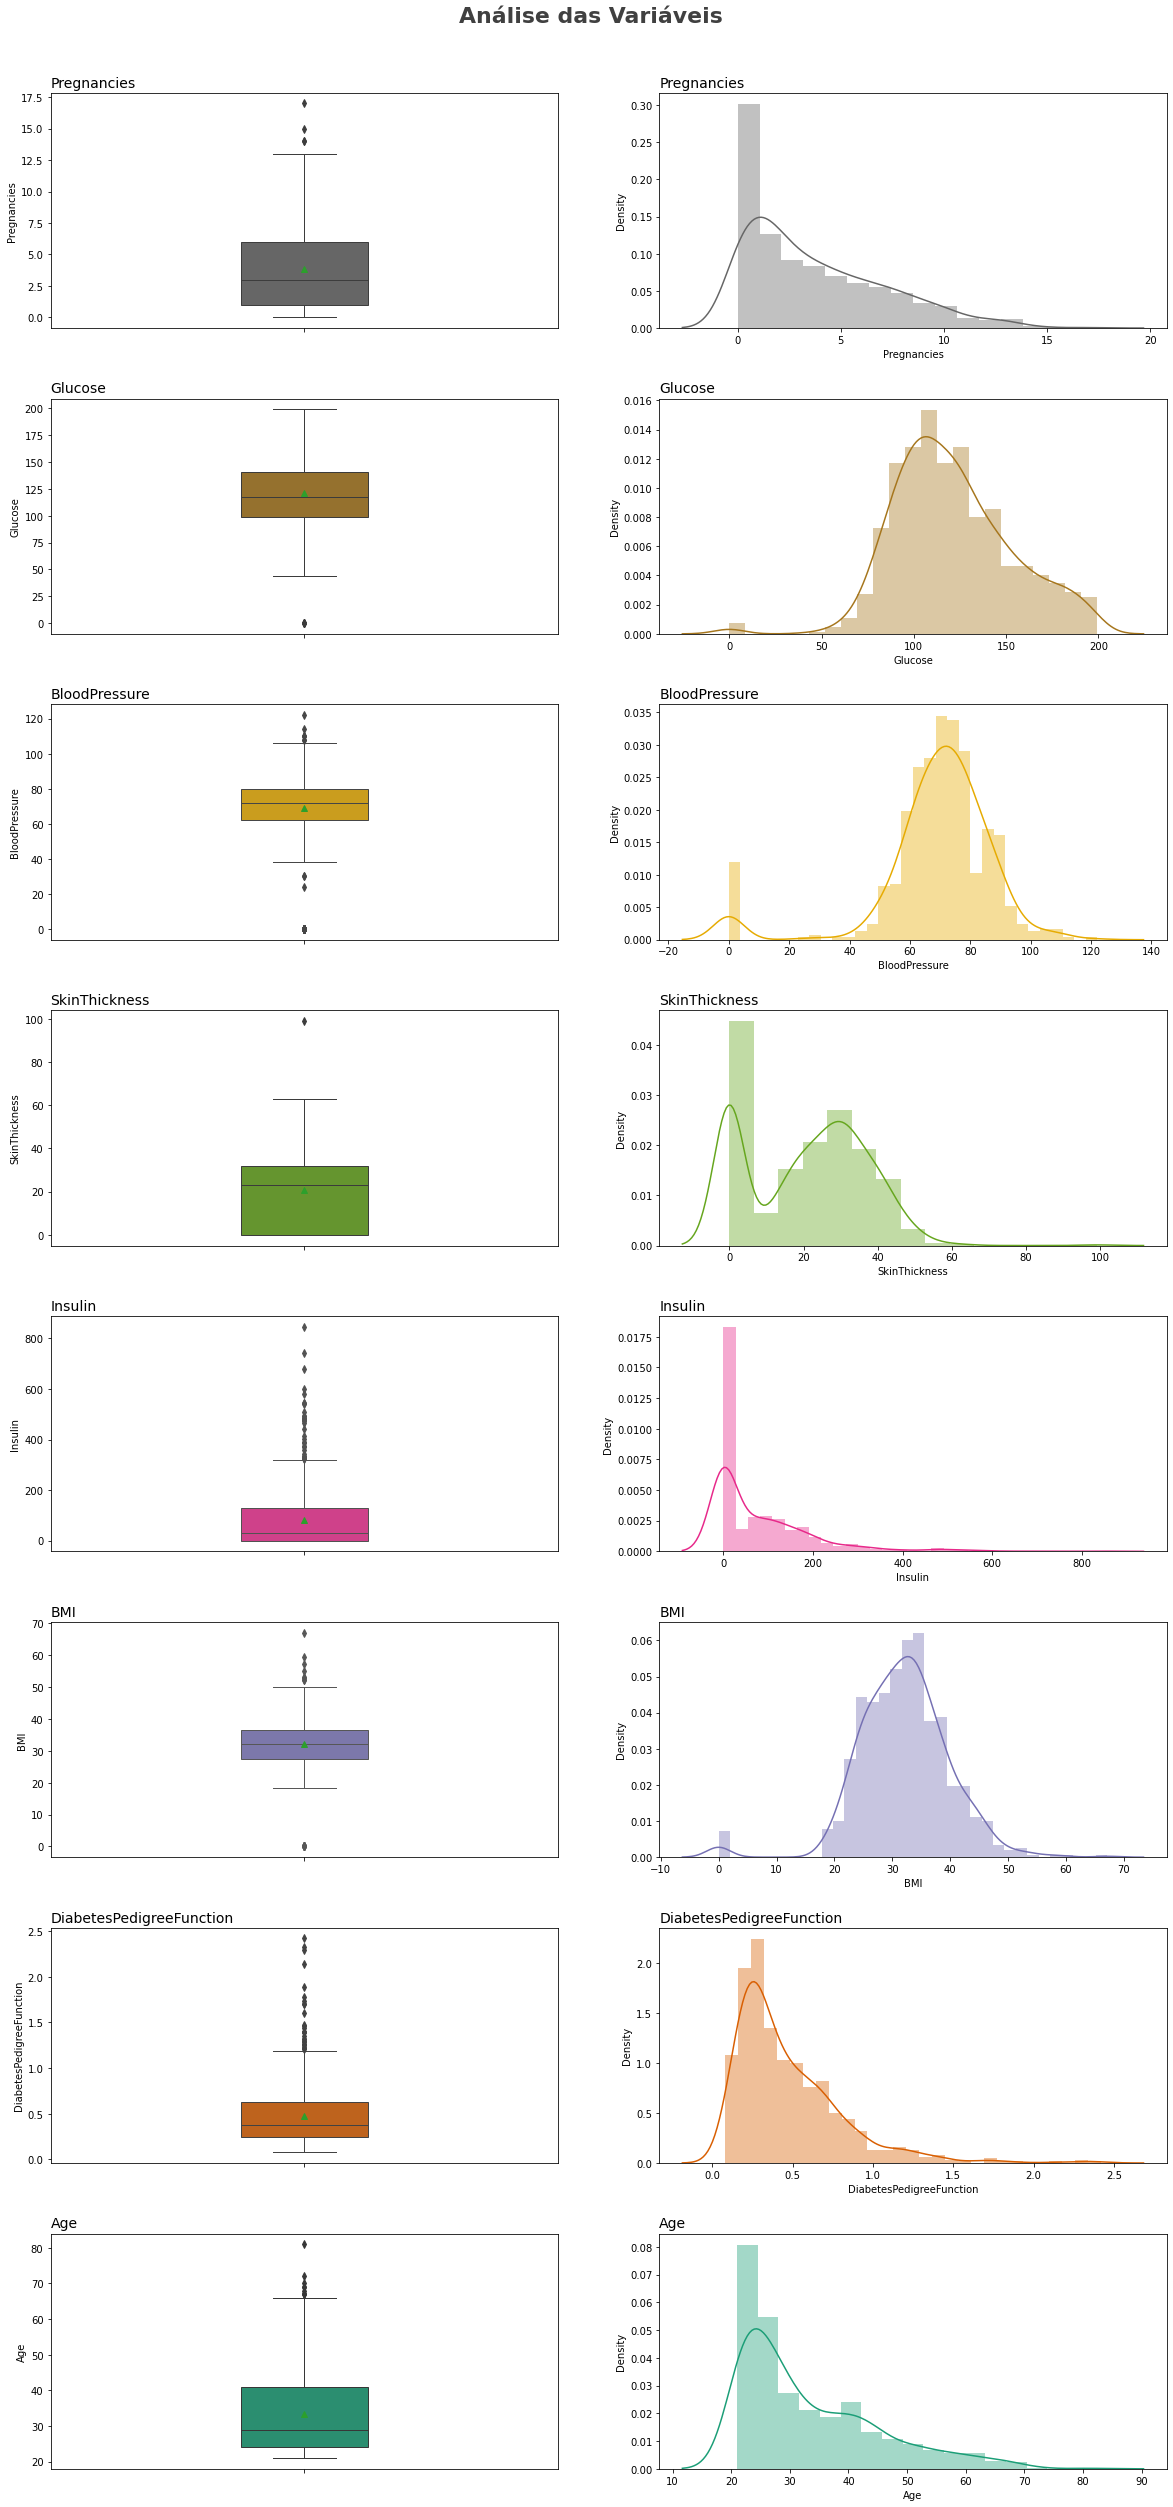

In [10]:
plot_histbox(df.drop('Outcome', axis = 1 ))

**Conclusão: Algumas features não faz sentido possuir valor 0, logo provavelmente é um erro humano. Por conta disso, devemos removê-los do nosso dataset.**

### Removendo dados errados

In [11]:
# Removendo valores abaixo de 40 da feature Glucose

index = df.loc[ df['Glucose'] < 40 ].index
df.drop(index = index, axis = 0, inplace = True)
df.shape

(763, 9)

In [12]:
# Removendo valores abaixo de 20 da feature BloodPressure

index = df.loc[ df['BloodPressure'] < 20 ].index
df.drop(index = index, axis = 0, inplace = True)
df.shape

(728, 9)

In [13]:
# Removendo valores abaixo de 18 da feature BMI

index = df.loc[ df['BMI'] < 18 ].index
df.drop(index = index, axis = 0, inplace = True)
df.shape

(724, 9)

### Para remover todos os outliers do boxplot poderíamos utilizar a seguinte código

In [14]:
"""
for coluna in df2.drop('Outcome', axis = 1).columns:
    Q1 = np.percentile(df2[coluna], 25,
                       interpolation = 'midpoint')

    Q3 = np.percentile(df2[coluna], 75,
                       interpolation = 'midpoint')
    IQR = Q3 - Q1

    print("Tamanho antigo: ", df2.shape)

    # Banda superior
    superior = np.where(df2[coluna] >= (Q3 + 1.5 * IQR))

    # Banda inferior
    inferior = np.where(df2[coluna] <= (Q1 - 1.5 * IQR))

    ''' Removendo os outliers '''
    df2.drop(superior[0], inplace = True)
    df2.drop(inferior[0], inplace = True)

    print("Tamanho novo: ", df2.shape)
    df2.reset_index(drop = True, inplace = True)
"""

'\nfor coluna in df2.drop(\'Outcome\', axis = 1).columns:\n    Q1 = np.percentile(df2[coluna], 25,\n                       interpolation = \'midpoint\')\n\n    Q3 = np.percentile(df2[coluna], 75,\n                       interpolation = \'midpoint\')\n    IQR = Q3 - Q1\n\n    print("Tamanho antigo: ", df2.shape)\n\n    # Banda superior\n    superior = np.where(df2[coluna] >= (Q3 + 1.5 * IQR))\n\n    # Banda inferior\n    inferior = np.where(df2[coluna] <= (Q1 - 1.5 * IQR))\n\n    \'\'\' Removendo os outliers \'\'\'\n    df2.drop(superior[0], inplace = True)\n    df2.drop(inferior[0], inplace = True)\n\n    print("Tamanho novo: ", df2.shape)\n    df2.reset_index(drop = True, inplace = True)\n'

# Feature Engineering

### Definindo de classes de acordo com o IMC

**Dicionário das classes:**

    - Abaixo de 18.5 -> Abaixo do peso
    - 18.5 – 24.9 -> Saudável
    - 25.0 – 29.9 -> Acima do peso
    - Acima de 30.0 -> Obeso

In [15]:
# Criando a coluna de classe
df['ObesityClass'] = np.nan

# Definindo as classes
df.loc[ df['BMI'] < 18.5,'ObesityClass'] = 'Abaixo'
df.loc[ (df['BMI'] > 18.5) & (df['BMI']<=24.9) ,'ObesityClass'] = 'Saudavel'
df.loc[ (df['BMI'] >= 25) & (df['BMI']<=29.9) ,'ObesityClass'] = 'Acima'
df.loc[ df['BMI'] >= 30 ,'ObesityClass'] = 'Obeso'

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ObesityClass
0,6,148,72,35,0,33.6,0.627,50,1,Obeso
1,1,85,66,29,0,26.6,0.351,31,0,Acima
2,8,183,64,0,0,23.3,0.672,32,1,Saudavel
3,1,89,66,23,94,28.1,0.167,21,0,Acima
4,0,137,40,35,168,43.1,2.288,33,1,Obeso


### Definindo classe de acordo com a glicose

**Dicionário das classes:**

    - 0 - 139 -> Normal
    - Acima de 139 -> Alta

In [17]:
df['GlucoseClass'] = pd.cut(x = df['Glucose'], bins=[0, 139, 200], labels = ['Normal', 'Alta'])

### Definindo classe de acordo com a insulina

**Dicionário das classes:**

    - Menor ou igual a 166 -> Normal
    - Acima de 166 -> Anormal

In [18]:
def classe_insulina(df):
    if df["Insulin"] <= 166:
        return "Normal"
    else:
        return "Anormal"     
    
df["InsulinClass"] = df.apply(classe_insulina, axis=1)

### Definindo classe de acordo com a idade

**Dicionário das classes:**

    - Menor ou igual a 59 -> Adulto
    - Acima de 59 -> Idoso

In [19]:
df['AgeClass'] = pd.cut(x = df['Age'], bins=[20, 59, 81], labels = ['Adulto', 'Idoso'])

### Aplicando o OneHotEnconding

In [20]:
df = pd.get_dummies(df, drop_first = True)

In [21]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,ObesityClass_Acima,ObesityClass_Obeso,ObesityClass_Saudavel,GlucoseClass_Alta,InsulinClass_Normal,AgeClass_Idoso
0,6,148,72,35,0,33.6,0.627,50,1,0,1,0,1,1,0
1,1,85,66,29,0,26.6,0.351,31,0,1,0,0,0,1,0
2,8,183,64,0,0,23.3,0.672,32,1,0,0,1,1,1,0
3,1,89,66,23,94,28.1,0.167,21,0,1,0,0,0,1,0
4,0,137,40,35,168,43.1,2.288,33,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0,1,0,0,0,1
764,2,122,70,27,0,36.8,0.340,27,0,0,1,0,0,1,0
765,5,121,72,23,112,26.2,0.245,30,0,1,0,0,0,1,0
766,1,126,60,0,0,30.1,0.349,47,1,0,1,0,0,1,0


### Visualizando o balanceamento da nossa variável target

0    475
1    249
Name: Outcome, dtype: int64

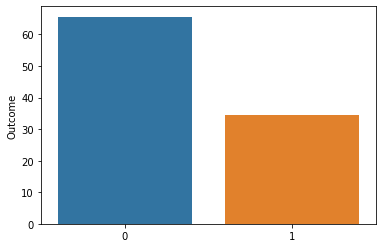

In [22]:
sns.barplot(x = [0, 1], y = df['Outcome'].value_counts(normalize = True) * 100);
df['Outcome'].value_counts()

### Separando as variáveis

In [23]:
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

**Conclusão: Precisamos balancear o dataset.**

### Balanceando o dataset

In [24]:
smt = SMOTETomek()

X_smt, y_smt = smt.fit_resample(X, y)

1    449
0    449
Name: Outcome, dtype: int64

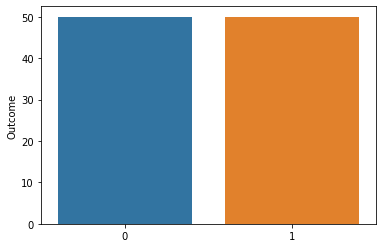

In [25]:
sns.barplot(x = [0, 1], y = y_smt.value_counts(normalize = True) * 100);
y_smt.value_counts()

### Visualizando a correlação entre as variáveis

In [26]:
def mapa_correlacao(data):
    """
    Essa função retorno um mapa de color das correlações
    """
    
    plt.figure(figsize = (20,10))
    sns.heatmap(round(data.corr(),2), annot = True);

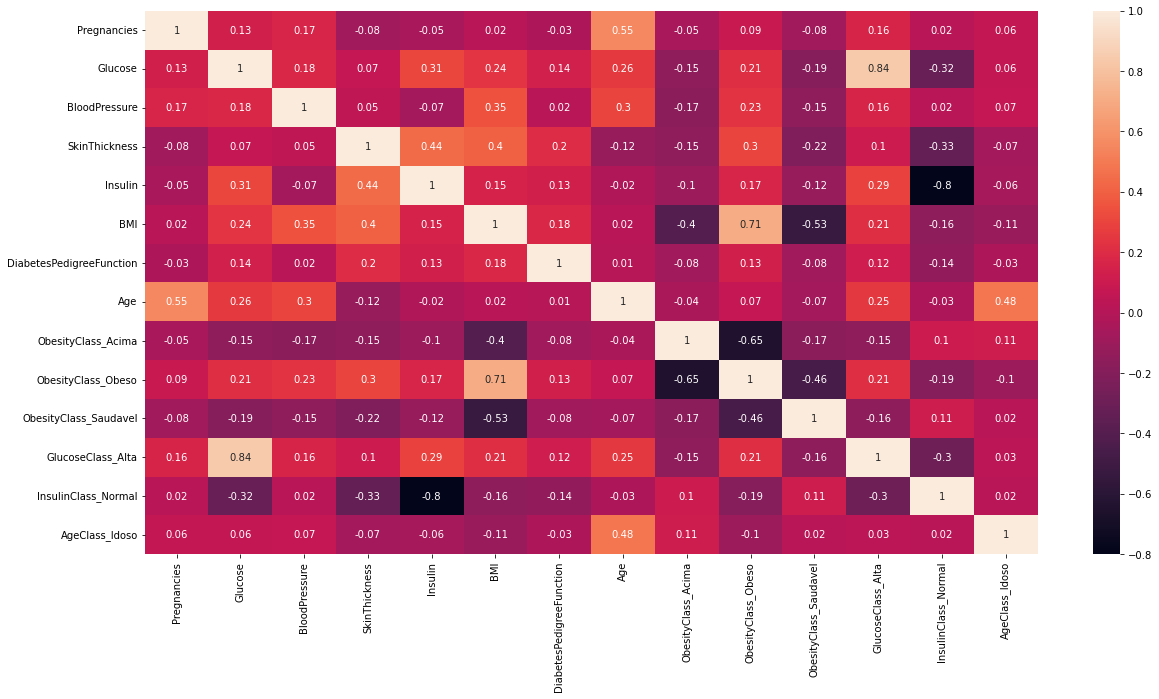

In [27]:
mapa_correlacao(X_smt)

**Conclusões:**
    
    1. Há uma forte correlação entre Age e Pregnancies
    2. Há uma forte correlação entre GlucoseClass_Alta e Glucose
    3. Há uma forte correlação entre InsulinClass_Normal e Insulin
    4. Há uma forte correlação entre ObesityClass_Obeso e BMI
    5. Há uma forte correlação entre ObesityClass_Saudavel e BMI
    6. Há uma forte correlação entre ObesityClass_Obeso e ObesityClass_Acima
    
OBS: Na hora de criar o modelo precisamos retirar essas variáveis com alta correlação.

### Visualizando as features com maiores variâncias

In [28]:
def var_selection(data):
    """
    Retorna um dataframe com as variâncias de cada coluna
    """
    scaler = MinMaxScaler()

    # colunas numéricas
    scaled_num_cols = scaler.fit_transform(data)
    scaled_num_df = pd.DataFrame(scaled_num_cols, columns = data.columns)

    variance = list()
    for column in scaled_num_df.columns:
        column_variance = scaled_num_df[column].var()
        variance.append(round(column_variance, 2))

    variance_df = pd.DataFrame(index = data.columns)
    variance_df['Variancia'] = variance
    variance_df
        
    return variance_df

In [29]:
df_variancia = var_selection( X_smt )
df_variancia.sort_values('Variancia')

,Variancia
BloodPressure,0.01
Insulin,0.02
BMI,0.02
DiabetesPedigreeFunction,0.02
SkinThickness,0.03
Age,0.03
AgeClass_Idoso,0.03
Pregnancies,0.04
Glucose,0.04
ObesityClass_Saudavel,0.09


**Vamos excluir as features que possuem alta correlação. Para escolher quais ficarão, vamos optar de acordo com sua variância.**

OBS: Uma variância maior significa que a variável trás mais explicações para o nosso modelo.

### Excluindo as features que possuem alta correlação

In [30]:
X_smt.drop(['Age', 'Glucose', 'Insulin', 'BMI', 'ObesityClass_Acima'],
        axis = 1, inplace = True)
df.shape

(724, 15)

# Criando o modelo

### Separando as variáveis em treino e teste

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size = 0.3, random_state = SEED)

### Padronizando os dados de X para o modelo KNN

In [32]:
padronizador = StandardScaler()
X_train_norm = padronizador.fit_transform(X_train)
X_test_norm = padronizador.transform(X_test)
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns)

### Instaciando os modelos

In [33]:
# Regressão Logística
reg_log = LogisticRegression()

# KNN
knn = KNeighborsClassifier()

### Definindo hiper parâmetro

In [34]:
# Regressão Logística
param_grid_reg_log = {'C': [0.001, 0.01, 0.1, 0.5, 1],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'class_weight': ['balanced', None]}

# KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11],
                'metric': ['minkowski', 'chebshev'],
                'p': np.array([1, 2, 3, 4])}

### Instânciando a validação cruzada

In [35]:
# assegura que em cada fold a seleção será aleatória, mas a proporção das classes seja mantida
cv = StratifiedKFold(n_splits = 5, random_state = SEED, shuffle = True)

### Procurando os melhores parâmetros

In [37]:
# Regressão Logística
clf_reg_log = RandomizedSearchCV(estimator = reg_log,
                                 param_distributions = param_grid_reg_log,
                                 scoring = 'precision',
                                 random_state = SEED,
                                 n_iter = 100,
                                 n_jobs = -1,
                                 verbose = 3,
                                 cv = cv)

# KNN
clf_knn = RandomizedSearchCV(estimator = knn,
                                 param_distributions = param_grid_knn,
                                 scoring = 'precision',
                                 random_state = SEED,
                                 n_iter = 100,
                                 n_jobs = -1,
                                 verbose = 3, 
                                 cv = cv)

### Treinando os modelos

In [38]:
# Regressão Logística
clf_reg_log.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
                   estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 0.5, 1],
                                        'class_weight': ['balanced', None],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none']},
                   random_state=123, scoring='precision', verbose=3)

In [39]:
# KNN
clf_knn.fit(X_train_norm, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
                   estimator=KNeighborsClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'metric': ['minkowski', 'chebshev'],
                                        'n_neighbors': [3, 5, 7, 9, 11],
                                        'p': array([1, 2, 3, 4])},
                   random_state=123, scoring='precision', verbose=3)

### Visualizando os melhores hiperparâmetros

In [40]:
# Regressão Logística
clf_reg_log.best_params_

{'penalty': 'none', 'class_weight': None, 'C': 0.001}

In [41]:
# KNN
clf_knn.best_params_

{'p': 4, 'n_neighbors': 5, 'metric': 'minkowski'}

### Prevendo valores do train e do teste

In [42]:
# Regressão Logística
Y_pred_train_reg = clf_reg_log.predict(X_train)
Y_pred_test_reg = clf_reg_log.predict(X_test)

# KNN
Y_pred_train_knn = clf_knn.predict(X_train_norm)
Y_pred_test_knn = clf_knn.predict(X_test_norm)

### Visualizando os scores

In [43]:
# Regressão Logística
acuracia_train_reg = accuracy_score(y_train, Y_pred_train_reg)
acuracia_test_reg = accuracy_score(y_test, Y_pred_test_reg)

acuracia_train_reg, acuracia_test_reg

(0.7245222929936306, 0.7592592592592593)

**Conclusão: Como os valores de treino e teste deram próximos, podemos concluir que não houve overfitting.**

In [44]:
# KNN
acuracia_train_knn = accuracy_score(y_train, Y_pred_train_knn)
acuracia_test_knn = accuracy_score(y_test, Y_pred_test_knn)

acuracia_train_knn, acuracia_test_knn

(0.8296178343949044, 0.7703703703703704)

**Conclusão: Como os valores de treino e teste deram próximos, podemos concluir que não houve overfitting.**

### Como escolher o melhor modelo?

Para escolher o melhor modelo temos que identificar qual é o objetivo do problema. Como se trata de um modelo de classificação para prever se a pessoa possui ou não diabetes, então o mais importante é máximizar o valor de verdadeiros positivo (TP).

### Visualizando a matriz de confusão

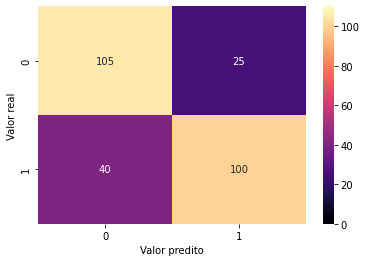

In [45]:
# Regressão Logística
matriz = confusion_matrix(y_test, Y_pred_test_reg)

sns.heatmap(matriz, vmin = 0, vmax = 110, annot = True, cmap = 'magma', fmt='.5g');
plt.ylabel('Valor real')
plt.xlabel('Valor predito');

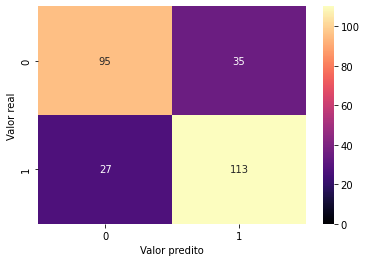

In [46]:
# KNN
matriz = confusion_matrix(y_test, Y_pred_test_knn)

sns.heatmap(matriz, vmin = 0, vmax = 110, annot = True, cmap = 'magma', fmt='.5g');
plt.ylabel('Valor real')
plt.xlabel('Valor predito');

### Comparando algumas métricas

In [47]:
# Regressão Logística
metricas_reg = classification_report(y_test, Y_pred_test_reg)

# KNN
metricas_knn = classification_report(y_test, Y_pred_test_knn)

In [48]:
print('Métricas Regressão Logística\n')
print(metricas_reg)
print('------------------------------------------------------')

print('Métricas KNN\n')
print(metricas_knn)

Métricas Regressão Logística

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       130
           1       0.80      0.71      0.75       140

    accuracy                           0.76       270
   macro avg       0.76      0.76      0.76       270
weighted avg       0.76      0.76      0.76       270

------------------------------------------------------
Métricas KNN

              precision    recall  f1-score   support

           0       0.78      0.73      0.75       130
           1       0.76      0.81      0.78       140

    accuracy                           0.77       270
   macro avg       0.77      0.77      0.77       270
weighted avg       0.77      0.77      0.77       270



**Conclusão: Não há muita diferença entre os modelos, mas o KNN é um modelo que tem um alto custo computacional. Portando, como não há muita diferença, o mais recomendado seria a regressão logística.**